In [2]:
import pickle
import pandas as pd
import geopandas as gpd

## Import and visualize index calculations

In [6]:
with open('colonies_no_rv_bbox_psi_one.pkl', 'rb') as f:
    colonies = pickle.load(f)

In [7]:
colonies.head()

,AREA,USO_AREA_U,HOUSETAX_C,USO_FINAL,geometry,area_km2,canal,railway,drain,barrier,...,school_pcen,school_idx,transport_count,transport_pcen,transport_idx,road_length,road_pcen,road_idx,unnorm_psi,norm_psi
0,NEW DELHI 36,5584,None,Planned,"POLYGON Z ((1020282.788 996796.773 0.000, 1020...",1.966739,False,True,False,True,...,2.566540,0.028971,3,24.398203,0.142039,1.951928,11.318965,0.234440,0.093715,0.096449
1,NEW DELHI 35,5585,None,Planned,"POLYGON Z ((1019724.475 994932.797 0.000, 1019...",0.036429,False,False,False,False,...,0.736853,0.008318,0,5.034648,0.029310,0.000000,0.360970,0.007476,0.049950,0.051408
2,NEW DELHI 34,5586,None,Planned,"POLYGON Z ((1019571.955 994876.019 0.000, 1019...",0.230739,False,False,False,False,...,6.757838,0.076284,6,9.070010,0.052803,0.000000,1.508212,0.031238,0.083330,0.085761
3,NEW DELHI 33,5587,None,Planned,"POLYGON Z ((1019352.702 994352.546 0.000, 1019...",0.281195,False,False,False,False,...,8.767378,0.098968,0,8.579348,0.049946,0.000000,1.729878,0.035830,0.071759,0.073852
4,NEW DELHI 32,5588,None,Planned,"POLYGON Z ((1018793.292 994224.182 0.000, 1018...",0.301253,False,False,False,False,...,7.934982,0.089571,2,5.836379,0.033978,0.747875,2.573545,0.053304,0.032901,0.033861


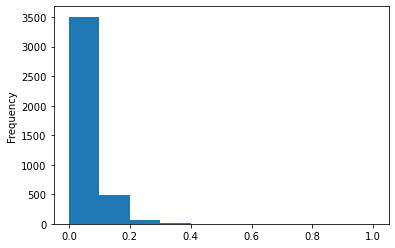

In [15]:
colonies[~ colonies['exclude_from_psi']]['norm_psi'].plot(kind='hist')

## Create Pandas Series with overall PSI

In [22]:
# Save overall PSI as Pandas Series 
# Includes 4075 of the origin 4352 colonies
unnorm_psi = colonies[~ colonies['exclude_from_psi']]['unnorm_psi']

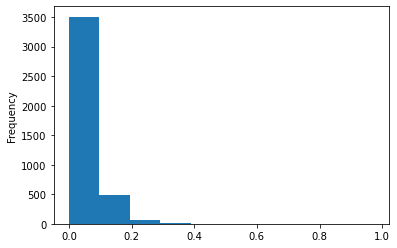

In [23]:
# Make sure histogram looks the same
unnorm_psi.plot(kind='hist')

## Yeo-Johnson Transform

[Here](https://machinelearningmastery.com/power-transforms-with-scikit-learn/) is some nice code to follow along with.

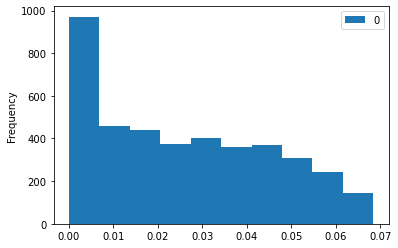

In [43]:
from sklearn.preprocessing import PowerTransformer

# Define Yeo-Johnson Transform
power = PowerTransformer(method='yeo-johnson', standardize=False)

# Apply transform. Requires turning DataFrame to numpy array
# and reshaping
data_trans = power.fit_transform(unnorm_psi.to_numpy().reshape(-1,1))

yj_transformed_psi = pd.DataFrame(data_trans)
yj_transformed_psi.plot(kind='hist')

In [63]:
# From: https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16

def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column-lower)/(upper-lower)
    return y

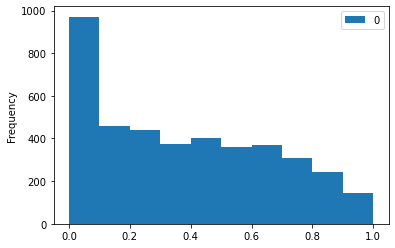

In [65]:
normalize(yj_transformed_psi).plot(kind='hist')

# More transforms below from [this webpage](https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16)

## Sigmoid transform

In [72]:
from numpy import exp

In [73]:
def sigmoid(x):
    e = exp(1)
    y = 1/(1+e**(-x))
    return y

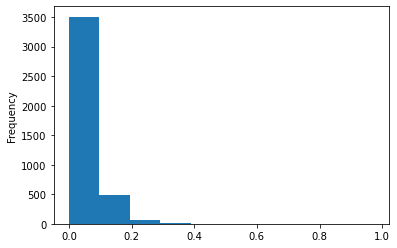

In [106]:
unnorm_psi.plot(kind='hist')

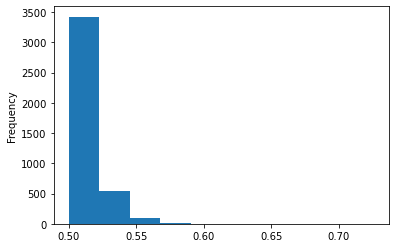

In [74]:
sigmoid(unnorm_psi).plot(kind='hist')

## Log Function + 1

In [75]:
from numpy import log

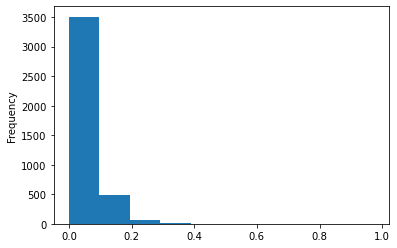

In [107]:
unnorm_psi.plot(kind='hist')

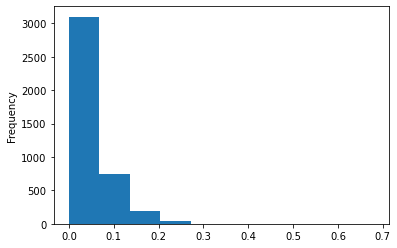

In [77]:
log(unnorm_psi+1).plot(kind='hist')

## Log Function + 1 Normalized

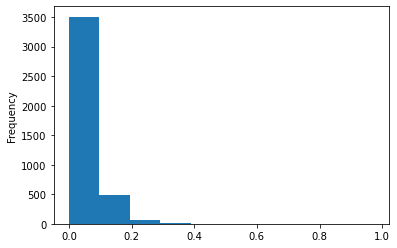

In [108]:
unnorm_psi.plot(kind='hist')

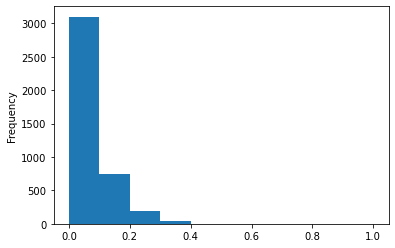

In [79]:
normalize(log(unnorm_psi+1)).plot(kind='hist')

## Cube Root

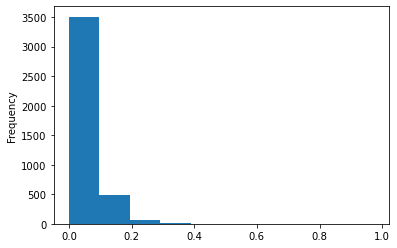

In [109]:
unnorm_psi.plot(kind='hist')

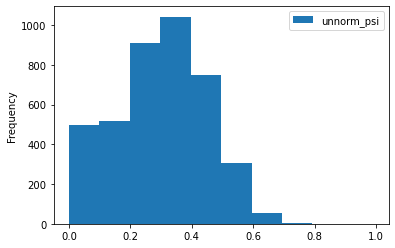

In [84]:
pd.DataFrame(unnorm_psi**(1/3)).plot(kind='hist')

## Cube Root Normalized

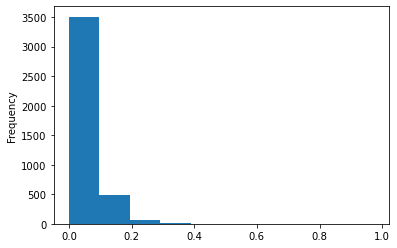

In [110]:
unnorm_psi.plot(kind='hist')

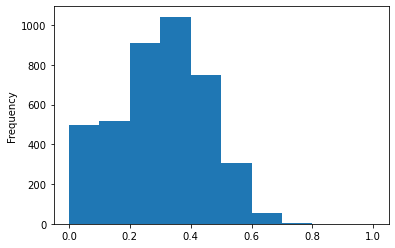

In [87]:
normalize(unnorm_psi**(1/3)).plot(kind='hist')

## Log Max Root Normalize

In [88]:
from numpy import log

In [90]:
log_max = log(unnorm_psi.max())

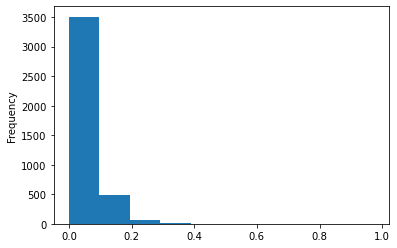

In [111]:
unnorm_psi.plot(kind='hist')

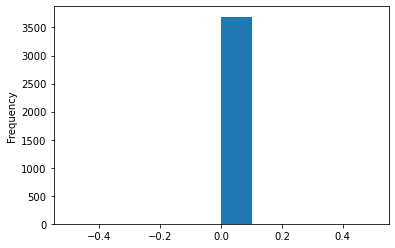

In [95]:
normalize(unnorm_psi**(1/log_max)).plot(kind='hist')

## Hyperbolic Tangent

In [96]:
from numpy import tanh

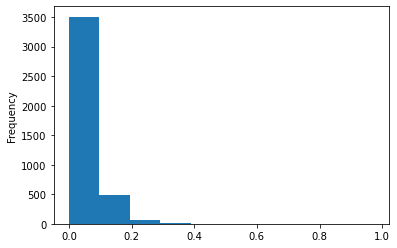

In [112]:
unnorm_psi.plot(kind='hist')

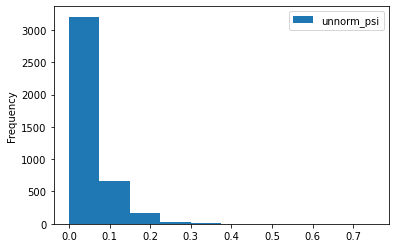

In [99]:
pd.DataFrame(tanh(unnorm_psi)).plot(kind='hist')

## Percentile Linearization

In [100]:
size = len(unnorm_psi) - 1

In [102]:
helpful_percentile_linearization = \
unnorm_psi.rank(method='min').apply(lambda x: (x-1)/size)

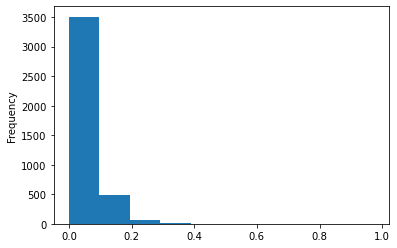

In [113]:
unnorm_psi.plot(kind='hist')

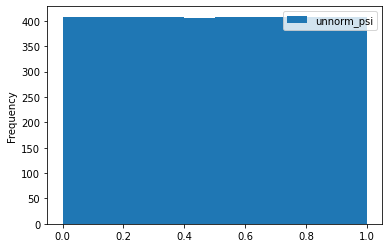

In [105]:
pd.DataFrame(helpful_percentile_linearization).plot(kind='hist')